In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re

# the following line makes use of panda to create a dataframe object from the give CSV file 
df = pd.read_csv('IDS-Data-Collection.csv')
#This CSV contains information of three sections of the CSE department (Class of 2021), you can open it with excel and check how the CSV looks like

In [6]:
#Basic operations on the data frame
df.describe() #this gives the min, max, quartiles and other details of the csv columns.
#The colums mean, median in the CSV are answers of students to basic statistic questions given to them while taking other info.


,Age,CGPA,Rate_Programming,Mean
count,1.820000e+02,182.000000,182.000000,1.790000e+02
mean,7.527474e+07,8.258984,3.131868,6.897040e+06
std,1.015512e+09,2.493025,0.837106,9.227594e+07
min,0.000000e+00,0.000000,1.000000,2.000000e-10
25%,1.800000e+01,7.515000,3.000000,6.000000e+00
50%,1.900000e+01,8.270000,3.000000,6.000000e+00
75%,1.900000e+01,8.900000,4.000000,6.000000e+00
max,1.370000e+10,33.340000,5.000000,1.234568e+09


In [8]:
df.head() #returns the first n rows, default value being 5

,Timestamp,Gender,Height,Weight,DOB,Age,Sun_Sign,CGPA,Rate_Programming,PL,...,Focus,DS_DA,Mean,Median,Sleep_time,sleep_duration,prefer_maths,Engg_Choice,course_instructor,physical_activity
0,8/6/2018 11:58:38,Female,5'3,74,7/30/1999,19.0,Aquarius,8.29,3,C++,...,Data,No,6.0,8,11:00:00 PM,5,Yes,Yes,Doesn't matter,On daily basis
1,8/6/2018 11:59:24,Male,176,62,6/4/1999,19.0,Gemini,8.27,4,C,...,Data,May be,6.0,9,1:00:00 AM,6.5,No,Yes,Doesn't matter,Once in a week
2,8/6/2018 11:59:47,Male,176,62,6/4/1999,19.0,Gemini,8.27,4,C,...,Data,May be,6.0,9,1:00:00 AM,6.5,No,Yes,Doesn't matter,Once in a week
3,8/6/2018 11:59:53,Female,145,60,2/21/2000,18.0,Don't Know,9.21,3,Python,...,Data,No,6.0,9,11:00:00 AM,6,Yes,Yes,Doesn't matter,Once in a week
4,8/6/2018 11:59:58,Male,185,56,8/15/1999,19.0,Leo,8.46,4,C,...,Data,No,6.0,8,11:30:00 PM,8,Yes,Yes,Doesn't matter,Once in a week


In [10]:
df.tail() #returns the alst n rows, default val = 5

,Timestamp,Gender,Height,Weight,DOB,Age,Sun_Sign,CGPA,Rate_Programming,PL,...,Focus,DS_DA,Mean,Median,Sleep_time,sleep_duration,prefer_maths,Engg_Choice,course_instructor,physical_activity
177,8/7/2018 11:04:24,Male,170,69,7/23/1999,19.0,Leo,7.58,3,C,...,Data,Yes,6.0,5.5,11:00:00 PM,7,Yes,Yes,Doesn't matter,On daily basis
178,8/7/2018 11:04:32,Male,165,55,7/21/1999,19.0,Libra,9.82,4,Python,...,Science,Yes,6.0,8,10:30:00 PM,8,Yes,Yes,Female,Not so often
179,8/7/2018 11:05:23,Male,5.9,65,5/16/1999,19.0,Taurus,8.00,4,C,...,Data,May be,NaN,8,11:30:00 PM,7,Yes,Doesn't matter,Doesn't matter,Not so often
180,8/7/2018 18:23:17,Male,170,50,9/7/1999,19.0,Capricorn,9.22,4,C,...,Science,No,6.0,8,11:00:00 PM,7,Yes,Yes,Doesn't matter,Once in a week
181,8/13/2018 18:36:34,Male,185,114,12/30/1998,19.0,Capricorn,8.05,4,Python,...,Science,No,6.0,9,12:30:00 PM,6,No,Yes,Female,Not so often


In [12]:
df.columns #gives the list of columns in the csv

Index(['Timestamp', 'Gender', 'Height', 'Weight', 'DOB', 'Age', 'Sun_Sign',
       'CGPA', 'Rate_Programming', 'PL', 'Sim_Course', 'Focus', 'DS_DA',
       'Mean', 'Median', 'Sleep_time', 'sleep_duration', 'prefer_maths',
       'Engg_Choice', 'course_instructor', 'physical_activity'],
      dtype='object')

In [14]:
df.shape #gives the shape of the dataframe ----> 182 records/rows x 21 attributes per record

(182, 21)

In [15]:
'''
IMPORTANT NOTE!

IF YOU GO THROUGH THE CSV FILE, THERE'S A LOT OF INVALID INFO, BASICALLY THE DATA IS NOT CLEAN.
FOR EXAMPLE, SOME STUDENTS HAVE ENTERED A CGPA OF >10, HENCE WE NEED TO CLEAN SUCH COLUMNS WHOM WE NEED TO WORK WITH
THE FOLLOWING CODE IS FOR "DATA-CLEANING".
'''

'\nIMPORTANT NOTE!\n\nIF YOU GO THROUGH THE CSV FILE, THERE\'S A LOT OF INVALID INFO, BASICALLY THE DATA IS NOT CLEAN.\nFOR EXAMPLE, SOME STUDENTS HAVE ENTERED A CGPA OF >10, HENCE WE NEED TO CLEAN SUCH COLUMNS WHOM WE NEED TO WORK WITH\nTHE FOLLOWING CODE IS FOR "DATA-CLEANING".\n'

In [16]:
#Cleaning CGPA 
for index, row in df.CGPA.iteritems():
    if row < 2.5 or row > 10:
        df.CGPA.loc[index] = np.median(df.CGPA) #Replaces CGPA records lesser than 2,5 and greater than 10 with the median of the cgpa column

#Note that cleaning the data does not actually change the CSV File! It changes the content of the dataframe (df) object!
#Ignore the warning 

C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#Cleaning Height
#the following function checks if the give value is float, please revise exception handling if you don't understand the code.
'''
If you look at the height column many of them are such that they cannot be converted into float, ex: 154cm
Many of them are in feet, i.e they can be converted into float but but need to be then converted into cm.

'''
def isfloat(value):
    try:
        float(value)
        return True
    except:
        return False

for index, row in df['Height'].iteritems():
    if(isfloat(row)): #If the value of height is a float 
        if(float(row) < 10): #and it's in feet
            df['Height'].loc[index] = float(row) * 30.48 #convert it into cm
        else :
            df['Height'].loc[index] = float(row) #leave it as it is by converting it into float if it's in cm
    else :
        y = re.split("['|cm|mm]", row) #if they word cm or mm is there, split it accordingly using regular expressions
        if(isfloat(y[0])):
            if(float(y[0]) < 10):
                df['Height'].loc[index] =  float(y[0]) * 30.48 + float(y[1]) * 2.54
            else:
                df['Height'].loc[index] = float(y[0])
        else:
            df['Height'].loc[index] = np.NaN #all the cases that aren't covered are given a value NaN which will be treated as a NIL type in pandas
        
df.Height = df.Height.fillna(np.median(df.Height)) #fill all NaN with median 

for index, row in df['Height'].iteritems(): #self explanatory
    if row <=100:
        df.Height.loc[index] = np.median(df.Height)
        
 

C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#Cleaning Weight Column
for index, row in df['Weight'].iteritems():
    if(isfloat(row)):
        df['Weight'].loc[index] = float(row)
    else :
        y = re.split("[kgs|Kg]", row)
        if(isfloat(y[0])):
            df['Weight'].loc[index] =  float(y[0])
        else:
            df['Weight'].loc[index] = np.NaN
            
df.Weight = df.Weight.fillna(np.mean(df.Weight))


C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#Cleaning sleep_duration
for index, row in df['sleep_duration'].iteritems():
    if(isfloat(row) and float(row) < 15):
        df['sleep_duration'].loc[index] = float(row)
    else:
        y = re.split("[-|:|hr|hrs|and]", row)
        if(isfloat(y[0]) and float(y[0]) < 15):
            df.sleep_duration.loc[index] = float(y[0])
        else:
            df.sleep_duration.loc[index] = np.NaN
            
df.sleep_duration = df.sleep_duration.fillna(np.mean(df.sleep_duration))

C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


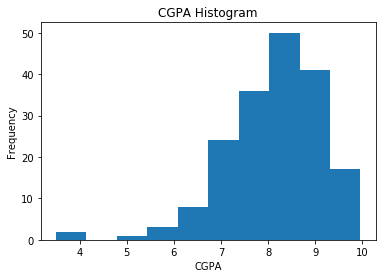

In [23]:
#Plotting Histograms using matplotlib; number of bins by default = 10 . (equal bin histogram)
freq, bins, patches = plt.hist(df.CGPA)  #fetching freq in each bin and bin values
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('CGPA Histogram')
plt.show()

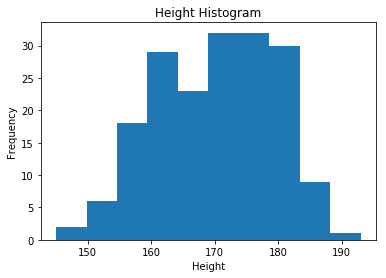

In [24]:
plt.hist(df.Height)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Histogram')
plt.show()

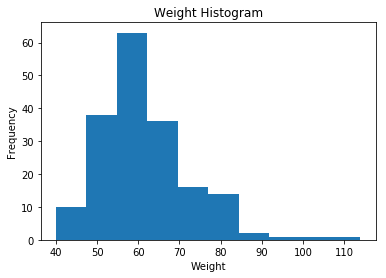

In [25]:
plt.hist(df.Weight)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Histogram')
plt.show()    

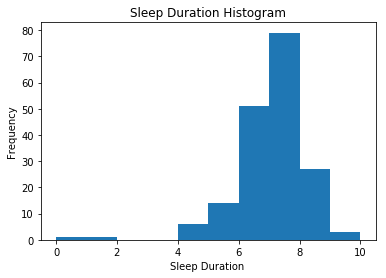

In [26]:
plt.hist(df.sleep_duration)
plt.xlabel('Sleep Duration ')
plt.ylabel('Frequency')
plt.title('Sleep Duration Histogram')
plt.show()

C:\Users\Deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


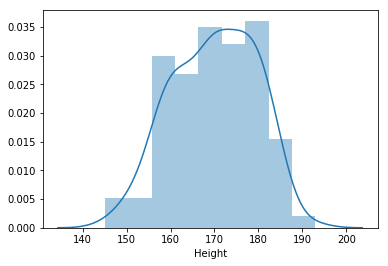

In [28]:
#plotting histogram using seaborn
sns.distplot(df.Height) #uses a standard rule to calculate number of bins and fits a plot on the histogram
plt.show()
# A much easier and accurate visualization method to use seaborn!! Not as comlicated as matplotlib

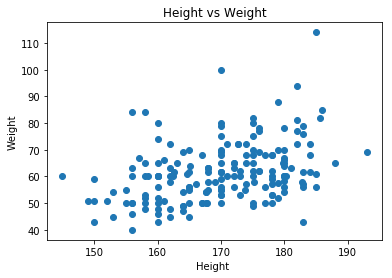

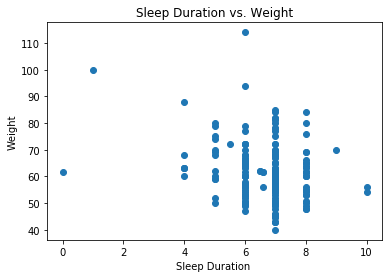

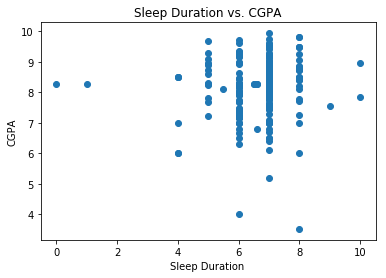

In [29]:
#plotting scatter plot
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height ')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

plt.scatter(df.sleep_duration, df.Weight)
plt.xlabel('Sleep Duration ')
plt.ylabel('Weight')
plt.title('Sleep Duration vs. Weight')
plt.show()

plt.scatter(df.sleep_duration, df.CGPA)
plt.xlabel('Sleep Duration ')
plt.ylabel('CGPA')
plt.title('Sleep Duration vs. CGPA')
plt.show()


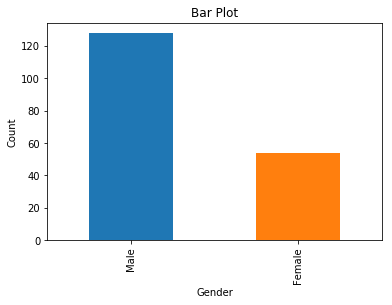

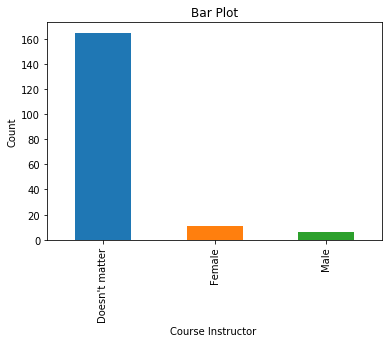

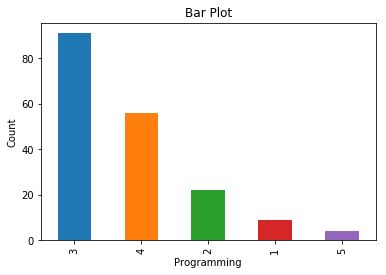

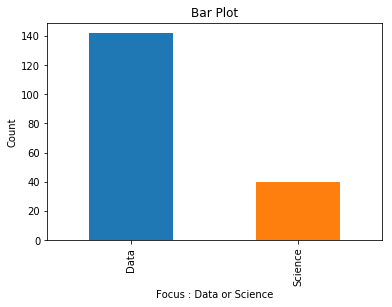

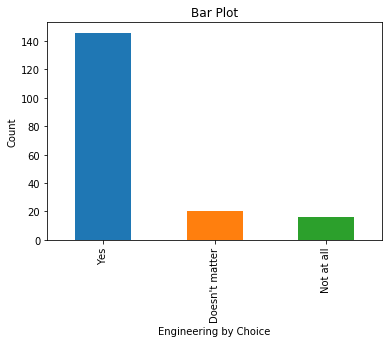

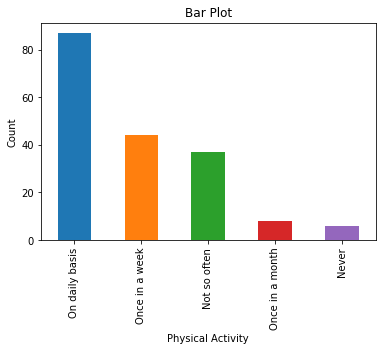

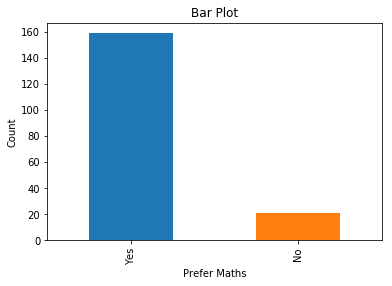

In [30]:

#Barcharts ; can also use plt.bar(no of categories, frequency)
df.Gender.value_counts().plot(kind="bar")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.course_instructor.value_counts().plot(kind = "bar")
plt.xlabel('Course Instructor ')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.Rate_Programming.value_counts().plot(kind = "bar")
plt.xlabel('Programming')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.Focus.value_counts().plot(kind = "bar")
plt.xlabel('Focus : Data or Science')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.Engg_Choice.value_counts().plot(kind = "bar")
plt.xlabel('Engineering by Choice')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.physical_activity.value_counts().plot(kind="bar")
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()
df.prefer_maths.value_counts().plot(kind = "bar")
plt.xlabel('Prefer Maths')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()


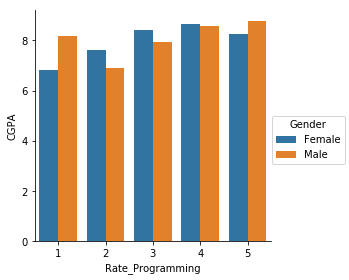

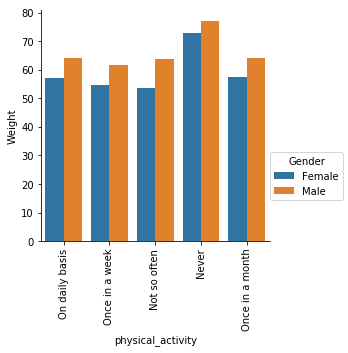

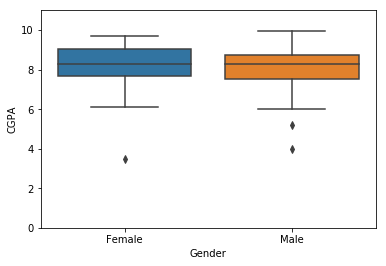

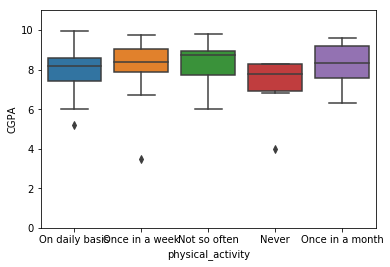

In [31]:
#In the set of arguments ci stands for confidence interval, please ignore this as of now.
#Grouped Bar Charts
sns.factorplot(x="Rate_Programming", y="CGPA", hue="Gender", data=df,kind="bar", ci = None)
plt.show()

x= sns.factorplot(x="physical_activity", y="Weight", hue="Gender", data=df,kind="bar", ci = None)
x.set_xticklabels(rotation=90)
plt.show()

#comparative box plots
sns.boxplot(x='Gender', y='CGPA', data=df)
plt.ylim(0, 11)
plt.show()

sns.boxplot(x='physical_activity', y='CGPA', data=df)
plt.ylim(0, 11)
plt.show()
